In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from lifelines import KaplanMeierFitter

In [8]:
df= pd.read_excel("KAtracecovid_19.xlsx")

In [9]:
df.head()

,Case,Date,Age,Sex,City,State,Nationality,Status,Secondary_infection,Outdate,survival_time,age_class,Sex_code
0,1,2020-03-09,41.0,M,Bangalore-Urban,Karnataka,India,alive,1,2020-03-27,18,3,1
1,2,2020-03-10,1.0,F,Bangalore-Urban,Karnataka,India,alive,0,2020-03-24,14,1,0
2,3,2020-03-10,13.0,F,Bangalore-Urban,Karnataka,India,alive,0,2020-03-27,17,1,0
3,4,2020-03-12,76.0,M,Kalburgi,Karnataka,India,dead,0,2020-03-13,1,4,1
4,5,2020-03-13,26.0,M,Bangalore-Urban,Karnataka,India,alive,0,2020-03-20,7,3,1


In [5]:
df["Age"].fillna(round(df.Age.mean()),inplace = True)

In [6]:
## organize data



In [7]:
Kmf_m =KaplanMeierFitter()
Kmf_f= KaplanMeierFitter()


In [8]:
df.loc[df.Status=='alive','Status_code']=0
df.loc[df.Status=='dead','Status_code']=1
df.head()

,Case,Date,Age,Sex,City,State,Nationality,Status,Secondary_infection,Outdate,survival_time,age_class,Sex_code,Status_code
0,1,2020-03-09,41.0,M,Bangalore-Urban,Karnataka,India,alive,1,2020-03-27,18,3,1,0.0
1,2,2020-03-10,1.0,F,Bangalore-Urban,Karnataka,India,alive,0,2020-03-24,14,1,0,0.0
2,3,2020-03-10,13.0,F,Bangalore-Urban,Karnataka,India,alive,0,2020-03-27,17,1,0,0.0
3,4,2020-03-12,76.0,M,Kalburgi,Karnataka,India,dead,0,2020-03-13,1,4,1,1.0
4,5,2020-03-13,26.0,M,Bangalore-Urban,Karnataka,India,alive,0,2020-03-20,7,3,1,0.0


In [10]:
male = df.query("Sex_code == 1")
female = df.query("Sex_code == 0")

In [11]:
male.head()

,Case,Date,Age,Sex,City,State,Nationality,Status,Secondary_infection,Outdate,survival_time,age_class,Sex_code,Status_code
0,1,2020-03-09,41.0,M,Bangalore-Urban,Karnataka,India,alive,1,2020-03-27,18,3,1,0.0
3,4,2020-03-12,76.0,M,Kalburgi,Karnataka,India,dead,0,2020-03-13,1,4,1,1.0
4,5,2020-03-13,26.0,M,Bangalore-Urban,Karnataka,India,alive,0,2020-03-20,7,3,1,0.0
5,6,2020-03-17,32.0,M,Bangalore-Urban,Karnataka,India,alive,0,2020-03-31,14,3,1,0.0
6,7,2020-03-17,63.0,M,Kalburgi,Karnataka,India,alive,1,2020-04-01,15,4,1,0.0


In [12]:
Kmf_m.fit(durations=male["survival_time"],event_observed=male["Status_code"],label="Male")
Kmf_f.fit(durations=female["survival_time"],event_observed=female["Status_code"],label="Female")

<lifelines.KaplanMeierFitter:"Female", fitted with 9688 total observations, 9354 right-censored observations>

In [13]:
Kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,444,444,0,16573,16573
1,191,47,144,0,16129
2,298,48,250,0,15938
3,319,35,284,0,15640
4,492,26,466,0,15321
5,593,19,574,0,14829
6,946,23,923,0,14236
7,1300,13,1287,0,13290
8,1563,8,1555,0,11990


In [14]:
Kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,232,232,0,9688,9688
1,104,25,79,0,9456
2,169,15,154,0,9352
3,191,8,183,0,9183
4,250,4,246,0,8992
5,343,11,332,0,8742
6,515,4,511,0,8399
7,742,8,734,0,7884
8,916,3,913,0,7142


In [15]:
Kmf_m.predict(14)

0.9561940251233564

In [16]:
Kmf_f.predict(14)

0.962424008564405

In [17]:
Kmf_m.survival_function_

,Male
timeline,
0.0,0.973209
1.0,0.970373
2.0,0.967451
3.0,0.965286
4.0,0.963648
5.0,0.962413
6.0,0.960858
7.0,0.959918
8.0,0.959278


In [18]:
Kmf_f.survival_function_

,Female
timeline,
0.0,0.976053
1.0,0.973472
2.0,0.971911
3.0,0.971064
4.0,0.970632
5.0,0.969411
6.0,0.968949
7.0,0.967966
8.0,0.967559


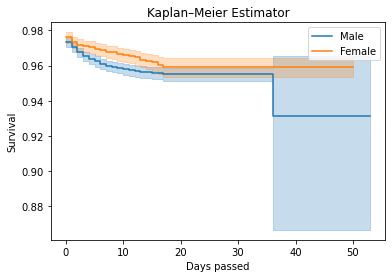

In [19]:
Kmf_m.plot()
Kmf_f.plot()

plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("Kaplan–Meier Estimator");

In [20]:
Kmf_m.cumulative_density_

,Male
timeline,
0.0,0.026791
1.0,0.029627
2.0,0.032549
3.0,0.034714
4.0,0.036352
5.0,0.037587
6.0,0.039142
7.0,0.040082
8.0,0.040722


In [21]:
Kmf_f.cumulative_density_

,Female
timeline,
0.0,0.023947
1.0,0.026528
2.0,0.028089
3.0,0.028936
4.0,0.029368
5.0,0.030589
6.0,0.031051
7.0,0.032034
8.0,0.032441


<AxesSubplot:xlabel='timeline'>

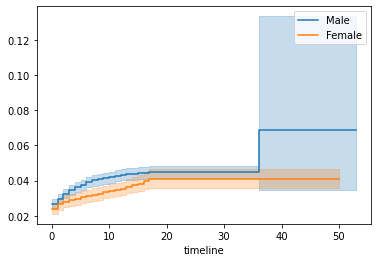

In [22]:
Kmf_m.plot_cumulative_density()
Kmf_f.plot_cumulative_density()

In [23]:
from lifelines import NelsonAalenFitter

In [24]:
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(male["survival_time"],event_observed = male["Status_code"])
naf_f.fit(female["survival_time"],event_observed = female["Status_code"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 9688 total observations, 9354 right-censored observations>

In [25]:
naf_m.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.027155
1.0,0.030073
2.0,0.033089
3.0,0.035330
4.0,0.037028
5.0,0.038310
6.0,0.039927
7.0,0.040906
8.0,0.041573


In [26]:
naf_f.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.024237
1.0,0.026884
2.0,0.028490
3.0,0.029361
4.0,0.029806
5.0,0.031065
6.0,0.031541
7.0,0.032557
8.0,0.032977


<AxesSubplot:xlabel='timeline'>

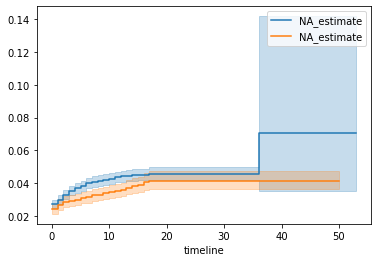

In [27]:
naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()

In [28]:
T=male["survival_time"]
E=male["Status_code"]
T1=female["survival_time"]
E1=female["Status_code"]

In [29]:
from lifelines.statistics import logrank_test
results = logrank_test(T,T1,event_observed_A=E,event_observed_B=E1)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.26 <0.005      7.95

# Cox proportional Hazard Model

In [30]:
import numpy as np

In [31]:
Kmf = KaplanMeierFitter()

In [32]:
Kmf.fit(durations = df["survival_time"], event_observed= df["Status_code"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 26261 total observations, 25238 right-censored observations>

In [33]:
Kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,676,676,0,26261,26261
1,295,72,223,0,25585
2,467,63,404,0,25290
3,510,43,467,0,24823
4,742,30,712,0,24313
5,936,30,906,0,23571
6,1461,27,1434,0,22635
7,2042,21,2021,0,21174
8,2479,11,2468,0,19132


In [34]:
from lifelines import CoxPHFitter

In [37]:
data= df[['survival_time','Age','Sex_code','Secondary_infection','Status_code']]
pd.isna(data).sum()
pd.isna(df).sum()

Case                   0
Date                   0
Age                    0
Sex                    0
City                   0
State                  0
Nationality            0
Status                 0
Secondary_infection    0
Outdate                0
survival_time          0
age_class              0
Sex_code               0
Status_code            0
dtype: int64

In [38]:
cph=CoxPHFitter()
cph.fit(data,"survival_time",event_col ="Status_code")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 26261 total observations, 25238 right-censored observations>
             duration col = 'survival_time'
                event col = 'Status_code'
      baseline estimation = breslow
   number of observations = 26261
number of events observed = 1023
   partial log-likelihood = -9389.26
         time fit was run = 2021-03-30 07:23:05 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
Age                   0.08       1.08       0.00             0.07             0.08                 1.08                 1.08
Sex_code              0.14       1.15       0.07             0.01             0.27                 1.01                 1.31
Secondary_infection   0.76       2.13       0.09             0.58             0.94                 1.78                 2.56

                        z      p   -log2(p)
covariate                                  
Age                 40.98 <0.005        inf
Sex_code             2.06   0.04       4.67
Secondary_infection  8.19 <0.005      51.75
---
Concordance = 0.85
Partial AIC = 18784.52
log-likelihood ratio test = 1866.97 on 3 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

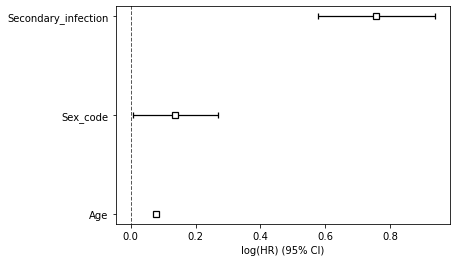

In [39]:
cph.plot()

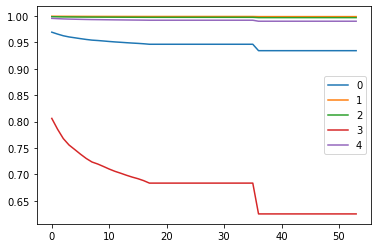

In [40]:
d_data = data.iloc[0:5,:]
cph.predict_survival_function(d_data).plot();